# Various simulations related to the signature and the randomized signature with sigmoid additions

### Mechanism for Brownian Motion

In [1192]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [1193]:
from timeit import default_timer as timer

In [1194]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

sigm_v = np.vectorize(sigmoid)

In [1195]:
id_v = np.vectorize(lambda a : a)
g1 = id_v
sq_v =  np.vectorize(lambda a : a*a)
g2 = sq_v
cu_v =  np.vectorize(lambda a : a*a*a)
g3 = cu_v
quo_v =  np.vectorize(lambda a : 1/(1+abs(a)))
g4 = quo_v
sqrt_v = np.vectorize(math.sqrt)
log_v = np.vectorize(math.log)
sin_v = np.vectorize(math.sin)
g5 = sin_v 
cos_v = np.vectorize(math.cos)
arctan_v = np.vectorize(np.arctan)
g6 = arctan_v

In [1196]:
arctan_v([1,2,3,4])

array([0.78539816, 1.10714872, 1.24904577, 1.32581766])

In [1197]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w

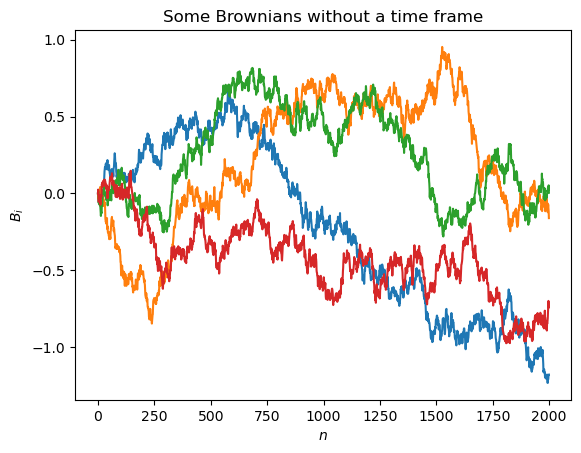

In [1198]:
b = Brownian()
for i in range(4):
    plt.plot(1*b.gen_normal(2000))

plt.title("Some Brownians without a time frame")
plt.xlabel("$n$")
plt.ylabel("$B_i$")
plt.show()

#### Function for scaling constant

In [1199]:
def scaling(d, M):
    r = 1
    for i in range(d):
        r += M ** (i+1)
    return r

In [1200]:
print(scaling(10, 4))

1398101


### Mechanism for random matrices and vectors

In [1201]:
A = np.random.normal(0, 1, size=(3, 2, 4))
v = np.random.normal(0, 1, size=(3))

In [1202]:
A, v

(array([[[-1.6641576 ,  0.31981411,  0.00554866, -1.47360977],
         [-0.57017527, -1.04124957,  1.66124997,  0.85477614]],
 
        [[ 0.3214951 ,  0.04705488, -0.03654355, -0.6723068 ],
         [-0.22607646,  0.4392574 ,  0.33009998, -0.45780418]],
 
        [[-1.27112657, -0.22244202,  1.25709208,  0.30012946],
         [-0.46985699, -0.51353589,  0.261705  , -1.21836129]]]),
 array([ 1.40303172, -0.23711091, -1.06802992]))

### Time&step structure

In [1203]:
N = 1001
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

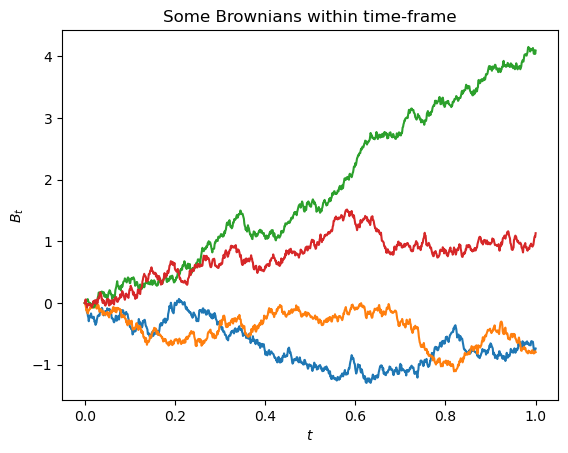

In [1204]:
for i in range(4):
    plt.plot(x_axis, b.gen_normal(N))
plt.title("Some Brownians within time-frame")
plt.xlabel("$t$")
plt.ylabel("$B_t$")
plt.show()

## 1-Dimensional Stochastic Double Well

### Time&step structure

In [1205]:
N = 1001
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

### Constructing the process

In [1206]:
b = Brownian()

theta, mu, sigma, y0 = 1, 2, 1, 1
Y = np.zeros(N)
Y[0] = y0
brow = b.gen_normal(N+1)
db =  np.diff(brow)

In [1207]:
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]

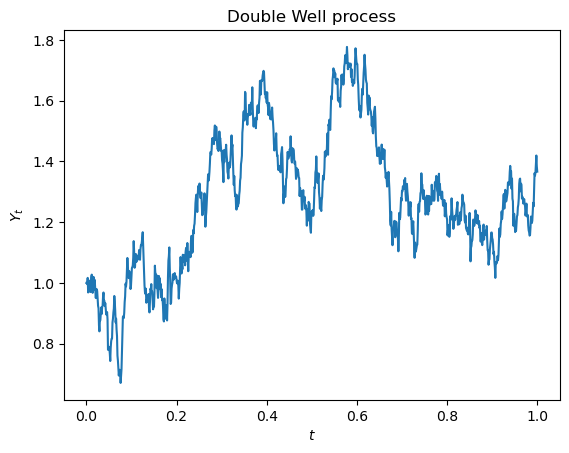

In [1208]:
plt.plot(x_axis, Y)
plt.title("Double Well process")
plt.xlabel("$t$")
plt.ylabel("$Y_t$")
plt.show()

### Constructing the randomized signature

In [1209]:
k = 50
A = np.random.normal(0, 1, size=(k, k))
b = np.random.normal(0, 1, size=k)
dY = np.diff(Y)
Z = np.zeros((N, k))
Z[0][0] = 1

##### With sigmoid

In [1210]:
for i in range(N-1):
    Z[i+1] =   Z[i] + sigm_v(A@Z[i] + b)*dY[i] 

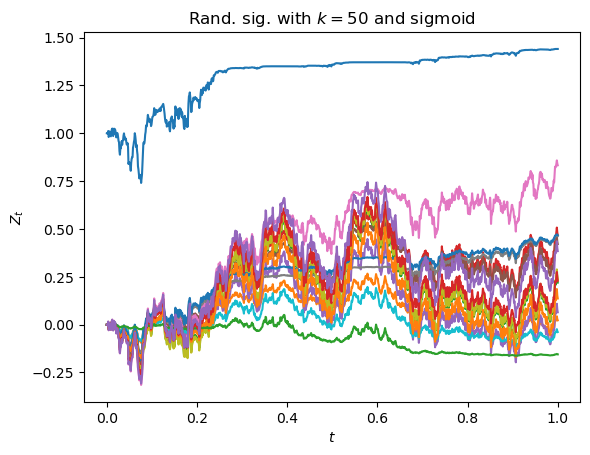

In [1211]:
for i in range(15):
    plt.plot(x_axis, Z[:,i])

plt.title("Rand. sig. with $k = 50$ and sigmoid")
plt.xlabel("$t$")
plt.ylabel("$Z_t$")
plt.show()

### Training the linear, time-homogeneous readout for just one sample - without regularization

In [1212]:
target_func = g1

In [1213]:
target = target_func(Y)

In [1214]:
model1 = LinearRegression().fit(Z, target)

In [1215]:
r_sq_1 = model1.score(Z,target)
print(f"coefficient of determination: {r_sq_1}")

coefficient of determination: 0.9999999999494622


In [1216]:
print(f"intercept: {model1.intercept_}")

intercept: 0.9974738945294335


In [1217]:
print(f"coefficients: {model1.coef_}")

coefficients: [ 0.00252471 -0.04223864  0.09429426  0.01069767  0.12677085  0.05893756
 -0.01031877 -0.02024302 -0.0297285   0.08469512 -0.05516185 -0.09833196
  0.13539357  0.2205556   0.38301441  0.10088205 -0.03317556 -0.14216852
 -0.02072757 -0.18419352  0.14134561  0.0388714  -0.04590311  0.05262359
  0.15693146  0.00149088 -0.00591357  0.14709321 -0.01128266 -0.03334198
  0.19055488 -0.02496399  0.07030999 -0.00781045  0.03260771 -0.05311014
  0.23948871  0.09192841  0.20016468  0.02322531  0.00600118  0.09937763
  0.09400599 -0.2892873   0.00059026  0.10957151  0.11876622 -0.19619453
 -0.0141199  -0.03300082]


In [1218]:
Y_pred_1 = model1.predict(Z)

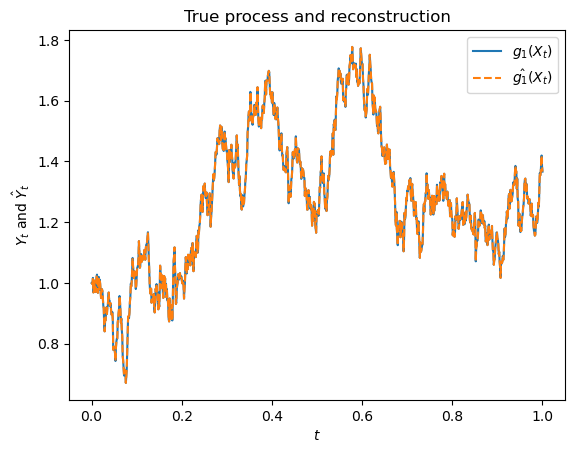

In [1224]:
plt.plot(x_axis, target)
plt.plot(x_axis, Y_pred_1, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

### Simulating n_sim times and testing out of sample with Gaussians - $g_1$ to $g_6$

In [1412]:
target_func = g5

In [1465]:
n_sim = 200
k = 20
A = np.random.normal(0, 1, size=(k, k))
b = np.random.normal(0, 1, size=k)
Y_big = np.zeros(N*n_sim)
target_big = np.zeros(N*n_sim)
Z_big = np.zeros((N*n_sim, k))
Y_big[0:N,] = np.ones(N)
Z_big[0:N,].shape

(1001, 20)

In [1466]:
for iter in range(n_sim):

    br = Brownian()
    Y = np.zeros(N)
    Y[0] = y0
    brow = br.gen_normal(N+1)
    db =  np.diff(brow)
    for i in range(N-1):
        Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
    dY = np.diff(Y)
    Z = np.zeros((N, k))
    Z[0][0] = 1
    for i in range(N-1):
        Z[i+1] = Z[i] + sigm_v(A@Z[i] + b)*dY[i]
    Y_big[iter*N:(iter+1)*N] = Y
    Z_big[iter*N:(iter+1)*N,:] = Z
    
    target = target_func(Y)
    target_big[iter*N:(iter+1)*N] = target

In [1467]:
model3 = Ridge(alpha=0.01)
model3.fit(Z_big, target_big)

Ridge(alpha=0.01)

In [1468]:
r_sq_3 = model3.score(Z_big, target_big)
print(f"coefficient of determination: {r_sq_3}")

coefficient of determination: 0.8950842307173569


In [1469]:
print(f"intercept: {model3.intercept_}")

intercept: -1.1168216537147986


In [1470]:
print(f"coefficients: {model3.coef_}")

coefficients: [ 1.84996324 -7.61685666  0.29148677 -0.7293149  -5.74852287  0.24752657
  1.24393112 -3.54526785  3.20490663 -0.53499936  4.39134973 -4.5111196
 -1.1000508   0.35206714 -3.83610582  0.34602771  3.01440182  5.76944883
  5.15294812  1.30646126]


In [1471]:
n_test = 1

In [1472]:
#np.mean(error)

In [1473]:
error_list = []
for i_test in range(n_test):    
    br = Brownian()
    Y = np.zeros(N)
    Y[0] = y0
    brow = br.gen_normal(N+1)
    db =  np.diff(brow)
    for i in range(N-1):
        Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
    dY = np.diff(Y)
    Z = np.zeros((N, k))
    Z[0][0] = 1
    for i in range(N-1):
        Z[i+1] = Z[i] + sigm_v(A@Z[i] + b)*dY[i]
    target = target_func(Y)
    Y_pred_3 = model3.predict(Z)
    error_list.append(np.linalg.norm(target-Y_pred_3)/np.linalg.norm(target))

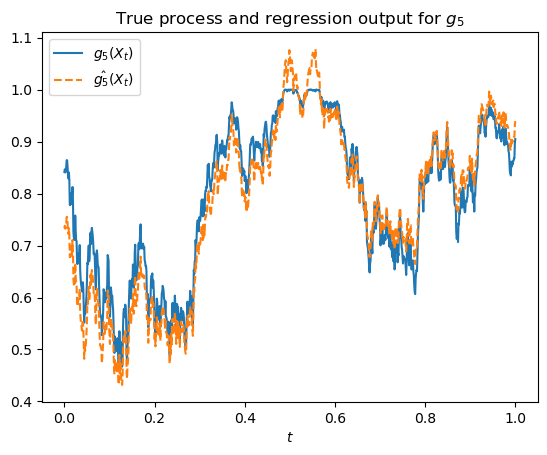

In [1474]:
#Y_big[0:N]
plt.plot(x_axis, target)
plt.plot(x_axis, Y_pred_3, '--')
plt.title("True process and regression output for $g_5$")
plt.xlabel("$t$")
plt.gca().legend(('$g_5(X_t)$','$\hat{g_5}(X_t)$'))
plt.show()

In [1475]:
np.mean(error_list)

0.05153451689772583

In [1352]:
#error_list

In [1238]:
np.linalg.norm(target-Y_pred_3)/np.linalg.norm(target)

0.0012646086894400601

## 4-Dimensional Ornstein–Uhlenbeck process

### Time&step structure

In [1476]:
N = 101
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

### Constructing the process

In [1477]:
y0_4, mu_4 = np.array([1,1,1,1]), np.array([1,1,1,1])
sigma_4 = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])
theta_4 = np.array([[1,1/2,1/3,1/4], [2,1,2/3,2/4], [3,3/2,1,3/4], [4,2,4/3,1]])
Y_4 = np.zeros((N,4))
Y_4[0] = y0_4
brow_4 = np.zeros((N+1,4))
#sigma_4 = theta_4

In [1478]:
br_4 = Brownian()

for i in range(4):
    brow_4[:,i] = br_4.gen_normal(N+1)
db_4 = np.diff(brow_4, axis = 0)

In [1479]:
for i in range(N-1):
    Y_4[i+1] = Y_4[i] + (mu_4 - theta_4 @ Y_4[i]) * step + sigma_4 @ db_4[i]

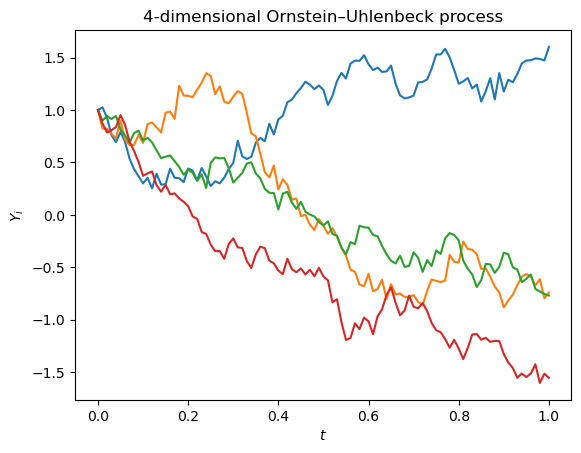

In [1484]:
for i in range(4):
    plt.plot(x_axis, Y_4[:,i])

plt.title("4-dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Y_i$")
plt.show()

### Constructing the randomized signature

In [1481]:
k_4 = 30
A_4 = np.random.normal(0, 1, size=(4, k_4, k_4))
b_4 = np.random.normal(0, 1, size=(4,k_4))
dY_4 = np.diff(Y_4, axis = 0)
Z_4 = np.zeros((N, k_4))
Z_4[0][0] = 1
#Z_4[0,:] = np.random.normal(0, 1, size=k_4)

##### with sigmoid

In [1482]:
for i in range(N-1):
    auxiliary = 0
    for j in range(4):
        auxiliary += sigm_v(A_4[j]@Z_4[i] + b_4[j])*dY_4[i][j]
    Z_4[i+1] = Z_4[i] + auxiliary

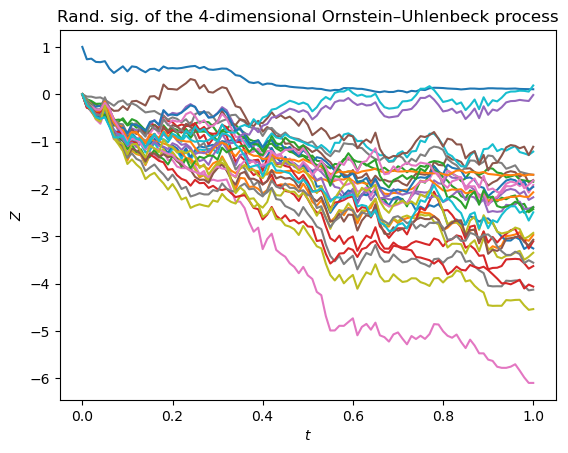

In [1485]:
for i in range(k_4):
    plt.plot(x_axis, Z_4[:,i])

plt.title("Rand. sig. of the 4-dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

### Defining some additional functions to recreate

In [698]:
def first_component(Y):
    return Y[:,0]

In [699]:
def second_component(Y):
    return Y[:,1]

In [700]:
def third_component(Y):
    return Y[:,2]

In [701]:
def fourth_component(Y):
    return Y[:,3]

In [702]:
def g7(Y):
    return first_component(Y)

In [703]:
def g8(Y):
    return second_component(Y) + third_component(Y)

In [704]:
def g9(Y):
    return np.multiply(first_component(Y), fourth_component(Y))

In [705]:
def g10(Y):
    return sin_v(np.multiply(third_component(Y), third_component(Y)))

In [706]:
def g11(Y):
    return np.multiply(first_component(Y), first_component(Y)) + np.multiply(np.multiply(third_component(Y), third_component(Y)), third_component(Y))

In [707]:
def g12(Y):
    return np.multiply(np.multiply(second_component(Y), second_component(Y)), cos_v(fourth_component(Y)))

In [708]:
ex = np.array([[1,2,2,2], [3, 4, 5, 6], [5, 6, 7, 8]])
ex.shape

(3, 4)

In [709]:
g12(ex)

array([-1.66458735, 15.36272459, -5.23800122])

### Recreating in sample

In [710]:
Z_4

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.89653542, -0.03845227, -0.06738158, ..., -0.03621854,
        -0.12266994, -0.01828544],
       [ 0.9835665 , -0.01649041,  0.01644827, ..., -0.01464692,
         0.01737877,  0.00991072],
       ...,
       [-1.09885554, -2.6060788 , -3.15717596, ..., -1.70211635,
        -1.05930221, -1.36740691],
       [-1.02292968, -2.4765951 , -3.00881997, ..., -1.63730152,
        -0.98245223, -1.22614726],
       [-1.02915349, -2.69083174, -3.1079345 , ..., -1.82647396,
        -1.0311981 , -1.23482028]])

In [751]:
target_func = g12

In [752]:
target_4 = target_func(Y_4)

In [753]:
model5 = LinearRegression().fit(Z_4, target_4)

In [754]:
r_sq_5 = model5.score(Z_4,target_4)
print(f"coefficient of determination: {r_sq_5}")

coefficient of determination: 0.9857522387778672


In [755]:
print(f"intercept: {model5.intercept_}")

intercept: 0.7796696494123883


In [756]:
print(f"coefficients: {model5.coef_}")

coefficients: [-0.2438539   0.1300278   0.26558489 -0.80992616 -0.00975499 -0.1713109
 -0.43120954  0.52145818 -0.4686623   0.78650848 -0.24960841  0.21774002
 -0.01303917 -0.21001084 -0.10972956 -0.3208439   0.305419   -0.10205553
  0.20561471 -0.52078152  0.13357748 -0.50374097  0.03313003  0.20238495
  0.01751698 -0.31849221  0.58341024  0.66908707  1.30980454 -0.43835207]


In [757]:
Y_pred_5 = model5.predict(Z_4)

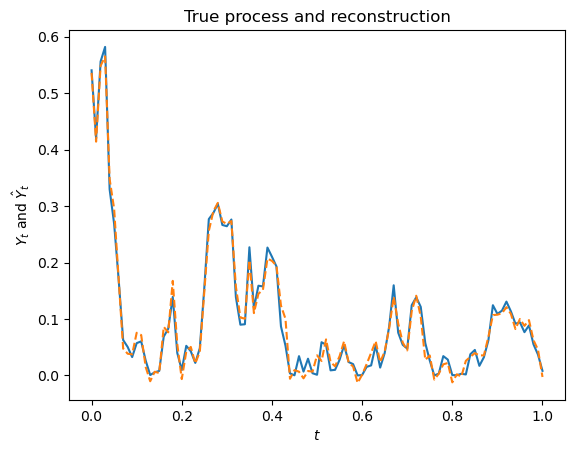

In [758]:
plt.plot(x_axis, target_4)
plt.plot(x_axis, Y_pred_5, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

### Simulating n_sim times and testing out of sample with Gaussians - $g_7$ to $g_{12}$

In [2038]:
target_func = g12

In [2039]:
N

101

In [2040]:
n_sim_4 = 10000
k_4 = 250
A_4 = np.random.normal(0, 1, size=(4, k_4, k_4))
b_4 = np.random.normal(0, 1, size=(4,k_4))
Y_big_4 = np.zeros((N*n_sim_4, 4))
target_big_4 = np.zeros(N*n_sim_4)
Z_big_4 = np.zeros((N*n_sim_4, k_4))
#Y_big_4[0:N,] = np.ones((N,4))
Y_big_4[0:N,].shape

(101, 4)

In [2041]:
for iter in range(n_sim_4):
    
    Y_4 = np.zeros((N,4))
    Y_4[0] = y0_4
    brow_4 = np.zeros((N+1,4))
    
    
    br_4 = Brownian()

    for i in range(4):
        brow_4[:,i] = br_4.gen_normal(N+1)
    db_4 = np.diff(brow_4, axis = 0)
    
    for i in range(N-1):
        Y_4[i+1] = Y_4[i] + (mu_4 - theta_4 @ Y_4[i]) * step + sigma_4 @ db_4[i]
        
    dY_4 = np.diff(Y_4, axis = 0)
    Z_4 = np.zeros((N, k_4))
    Z_4[0][0] = 1
    
    for i in range(N-1):
        auxiliary = 0
        for j in range(4):
            auxiliary += sigm_v(A_4[j]@Z_4[i] + b_4[j])*dY_4[i][j]
        Z_4[i+1] = Z_4[i] + auxiliary
        
        
        
        
    Y_big_4[iter*N:(iter+1)*N,:] = Y_4
    Z_big_4[iter*N:(iter+1)*N,:] = Z_4
    
    target_4 = target_func(Y_4)
    target_big_4[iter*N:(iter+1)*N] = target_4

In [2042]:
model4 = Ridge(alpha=0.001)
model4.fit(Z_big_4, target_big_4)

Ridge(alpha=0.001)

In [2043]:
r_sq_4 = model4.score(Z_big_4, target_big_4)
print(f"coefficient of determination: {r_sq_4}")

coefficient of determination: 0.5322794514418709


In [2044]:
print(f"intercept: {model4.intercept_}")

intercept: 0.650528475140069


In [2045]:
print(f"coefficients: {model4.coef_}")

coefficients: [-9.37742315e-03 -3.75903310e-02  7.84331954e-02 -5.89084948e-03
 -2.35548329e-02 -4.52125201e-02 -5.11725389e-02 -2.88708866e-02
 -3.86598078e-03 -1.00229126e-02  9.65108229e-02  1.53010323e-02
 -1.30657977e-01 -7.56613580e-02 -3.34654672e-02 -4.05399775e-02
  3.32419275e-02 -3.00051425e-02  2.89064322e-02  2.83277108e-02
  5.25335736e-02  6.09719324e-02  4.79825741e-03 -4.91887795e-02
  1.62545484e-02  5.52504364e-02  2.12429435e-02  6.57124468e-02
 -1.05005709e-01 -5.02542006e-02 -9.48038739e-03  5.08201266e-03
 -8.21619764e-02 -5.37325258e-02  4.99799516e-03 -6.16494839e-02
  4.92041572e-03  3.01469522e-04 -1.03281762e-01 -1.68335690e-02
  2.07055680e-02 -1.46477079e-01 -4.33278561e-02  2.59831592e-01
  1.07759552e-02 -1.27920024e-02  4.14583541e-02 -1.00368703e-01
 -3.76180052e-02  9.59402258e-04 -5.94883339e-02  6.10726505e-04
  3.97795556e-02  1.54815651e-01  3.66515916e-02 -5.80969871e-02
  4.16407346e-02  5.33269969e-02 -2.43145389e-02  1.89091413e-02
  1.5638681

In [2051]:
n_test_4 = 1

In [2052]:
error_list_4 = []
for iter_er_4 in range(n_test_4):    
    Y_4 = np.zeros((N,4))
    Y_4[0] = y0_4
    brow_4 = np.zeros((N+1,4))
        

    br_4 = Brownian()
    
    for i in range(4):
        brow_4[:,i] = br_4.gen_normal(N+1)
    db_4 = np.diff(brow_4, axis = 0)

    for i in range(N-1):
            Y_4[i+1] = Y_4[i] + (mu_4 - theta_4 @ Y_4[i]) * step + sigma_4 @ db_4[i]
        
    dY_4 = np.diff(Y_4, axis = 0)
    Z_4 = np.zeros((N, k_4))
    Z_4[0][0] = 1
    
    for i in range(N-1):
        auxiliary = 0
        for j in range(4):
            auxiliary += sigm_v(A_4[j]@Z_4[i] + b_4[j])*dY_4[i][j]
        Z_4[i+1] = Z_4[i] + auxiliary
    target_4 = target_func(Y_4)
    Y_pred_4 = model4.predict(Z_4)
    error_list_4.append(np.linalg.norm(target_4-Y_pred_4)/np.linalg.norm(target_4))

In [2053]:
np.mean(error_list_4)

0.7064798421604084

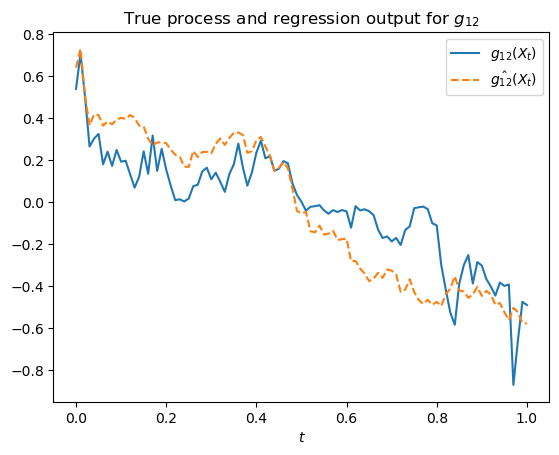

In [2054]:
#Y_big[0:N]
plt.plot(x_axis, target_4)
plt.plot(x_axis, Y_pred_4, '--')
plt.title("True process and regression output for $g_{12}$")
plt.xlabel("$t$")
plt.gca().legend(('$g_{12}(X_t)$','$\hat{g_{12}}(X_t)$'))
plt.show()

In [2050]:
np.linalg.norm(target_4-Y_pred_4)/np.linalg.norm(target_4)

0.37915951460450176

In [998]:
#Y_pred_4 = model4.predict(Z_big_4[0:N,:])

In [934]:
#Y_big[0:N]
#plt.plot(x_axis, Y_big_4[0:N,0])
#plt.plot(x_axis, Y_pred_4, '--')
#plt.title("True process and regression output for $g_6$")
#plt.xlabel("$t$")
#plt.ylabel("$g_6(Y_t)$ and $\hat{g_6}(Y_t)$")
#plt.show()

In [935]:
np.linalg.norm(Y_big_4[0:N,0]-Y_pred_4)/np.linalg.norm(Y_big_4[0:N,0])

1.3195407992740056

## 10-Dimensional Made-Up process

In [916]:
y0_10, mu_10 = np.ones(10), np.ones(10)
sigma_10 = np.eye(10)
theta_10 = np.zeros((10, 10))

for i in range(10):
    for j in range(10):
        theta_10[i][j] = (i+1)/(j+1)

In [917]:
Y_10 = np.zeros((N,10))
Y_10[0] = y0_10
brow_10 = np.zeros((N+1,10))

In [918]:
b_10 = Brownian()

for i in range(10):
    brow_10[:,i] = b_10.gen_normal(N+1)
db_10 = np.diff(brow_10, axis = 0)

In [919]:
for i in range(N-1):
    Y_10[i+1] = Y_10[i] + (mu_10 - theta_10 @ Y_10[i]) * step + sigma_10 @ db_10[i]

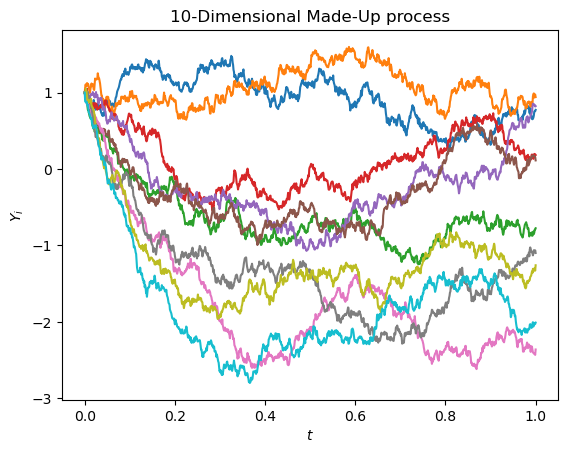

In [920]:
for i in range(10):
    plt.plot(x_axis, Y_10[:,i])

plt.title("10-Dimensional Made-Up process")
plt.xlabel("$t$")
plt.ylabel("$Y_i$")
plt.show()

### Constructing the randomized signature - 10-Dimensional Made-Up process

In [921]:
k_10 = 10
A_10 = np.random.normal(0, 1, size=(10, k_10, k_10))
b_10 = np.random.normal(0, 1, size=(10, k_10))
dY_10 = np.diff(Y_10, axis = 0)
Z_10 = np.zeros((N, k_10))
Z_10[0][0] = 1

In [922]:
dY_10.shape

(1000, 10)

In [923]:
lambda_d10 = 1 / scaling(10, 4)

In [926]:
for i in range(N-1):
    for j in range(10):
        Z_10[i+1] = Z_10[i] + sigm_v(A_10[j]@Z_10[i] + b_10[j])*dY_10[i][j]

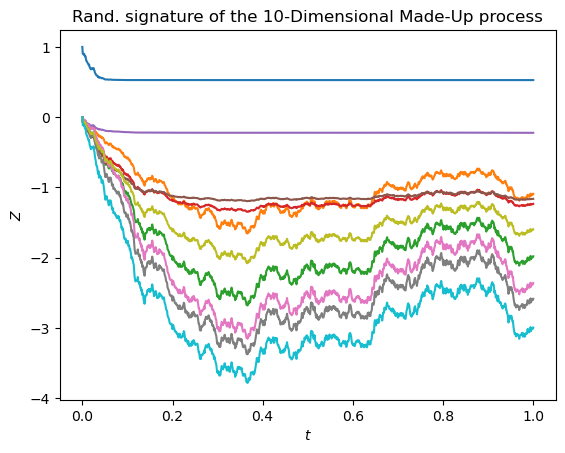

In [927]:
for i in range(10):
    plt.plot(x_axis, Z_10[:,i])

plt.title("Rand. signature of the 10-Dimensional Made-Up process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

### $Nsim$-Dimensional generalized Ornstein–Uhlenbeck process

In [928]:
Nsim = 50 #free to choose dimensionality of the generalized process

In [929]:
y0_Nsim, mu_Nsim = np.ones(Nsim), np.ones(Nsim)
sigma_Nsim = np.eye(Nsim)
theta_Nsim = np.zeros((Nsim, Nsim))

for i in range(Nsim):
    for j in range(Nsim):
        theta_Nsim[i][j] = (i+1)/(j+1)

In [930]:
Y_Nsim = np.zeros((N,Nsim))
Y_Nsim[0] = y0_Nsim
brow_Nsim = np.zeros((N+1,Nsim))

In [931]:
b_Nsim = Brownian()

for i in range(Nsim):
    brow_Nsim[:,i] = b_Nsim.gen_normal(N+1)
db_Nsim = np.diff(brow_Nsim, axis = 0)

In [932]:
for i in range(N-1):
    Y_Nsim[i+1] = Y_Nsim[i] + (mu_Nsim - theta_Nsim @ Y_Nsim[i]) * step + sigma_Nsim @ db_Nsim[i]

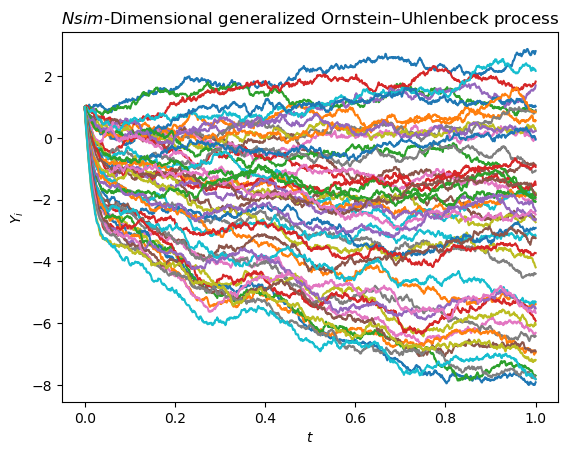

In [933]:
for i in range(Nsim):
    plt.plot(x_axis, Y_Nsim[:,i])

plt.title("$Nsim$-Dimensional generalized Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Y_i$")
plt.show()

### Constructing the randomized signature - $Nsim$-Dimensional generalized Ornstein–Uhlenbeck process

In [934]:
N = 101
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

In [935]:
k_Nsim = 1000 #free to choose dimensionality of the rand. signature

In [936]:
A_Nsim = np.random.normal(0, 1, size=(Nsim, k_Nsim, k_Nsim))
b_Nsim = np.random.normal(0, 1, size=(Nsim, k_Nsim))
dY_Nsim = np.diff(Y_Nsim, axis = 0)
Z_Nsim = np.zeros((N, k_Nsim))
Z_Nsim[0][0] = 1

In [937]:
dY_Nsim.shape

(1000, 50)

In [938]:
lambda_dNsim = 1 / scaling(10, 4)

In [939]:
start = timer()
for i in range(N-1):
    for j in range(Nsim):
        Z_Nsim[i+1] = Z_Nsim[i] + sigm_v(A_Nsim[j]@Z_Nsim[i] + b_Nsim[j])*dY_Nsim[i][j]
end = timer()
print(end - start)

5.967199200000323


In [940]:
print(N)

101


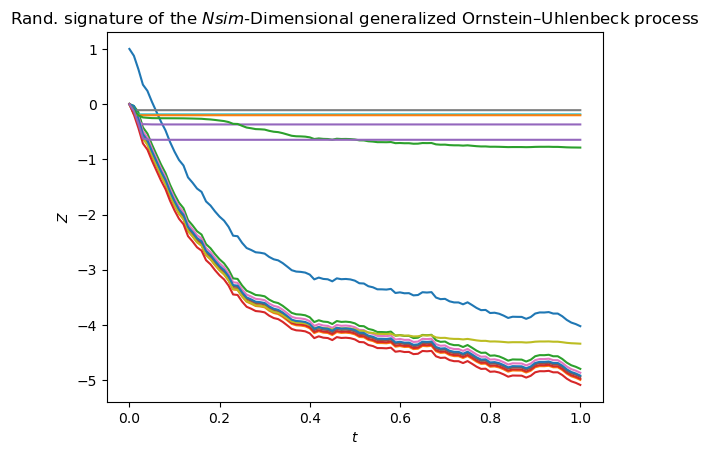

In [941]:
for i in range(15):
    plt.plot(x_axis, Z_Nsim[:,i])

plt.title("Rand. signature of the $Nsim$-Dimensional generalized Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()